In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets


In [2]:
iris=datasets.load_iris()

In [3]:
iris_data=pd.DataFrame(iris.data)

In [4]:
iris_data.columns=iris.feature_names

In [5]:
iris_data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [6]:
#feature scale
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [7]:
x_scaled=sc.fit_transform(iris_data)
x_scaled

array([[-9.00681170e-01,  1.01900435e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00, -1.31979479e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.38535265e+00,  3.28414053e-01, -1.39706395e+00,
        -1.31544430e+00],
       [-1.50652052e+00,  9.82172869e-02, -1.28338910e+00,
        -1.31544430e+00],
       [-1.02184904e+00,  1.24920112e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-5.37177559e-01,  1.93979142e+00, -1.16971425e+00,
        -1.05217993e+00],
       [-1.50652052e+00,  7.88807586e-01, -1.34022653e+00,
        -1.18381211e+00],
       [-1.02184904e+00,  7.88807586e-01, -1.28338910e+00,
        -1.31544430e+00],
       [-1.74885626e+00, -3.62176246e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00,  9.82172869e-02, -1.28338910e+00,
        -1.44707648e+00],
       [-5.37177559e-01,  1.47939788e+00, -1.28338910e+00,
        -1.31544430e+00],
       [-1.26418478e+00,  7.88807586e-01, -1.22655167e+00,
      

In [8]:
# Apply the PCA to the data
from sklearn.decomposition import PCA

In [9]:
pca=PCA(n_components=2)

In [10]:
pca_scaled=pca.fit_transform(x_scaled)

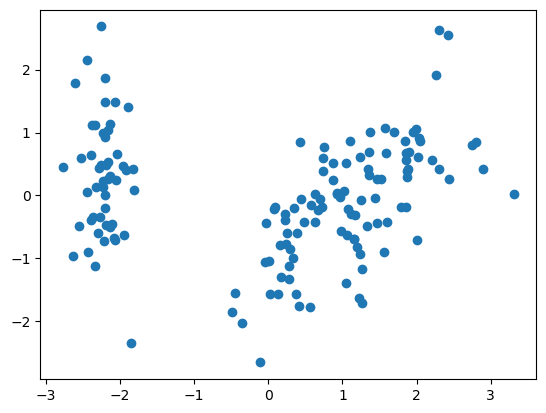

In [11]:
plt.scatter(pca_scaled[:,0], pca_scaled[:,1])

Text(0, 0.5, 'Euclidean distances')

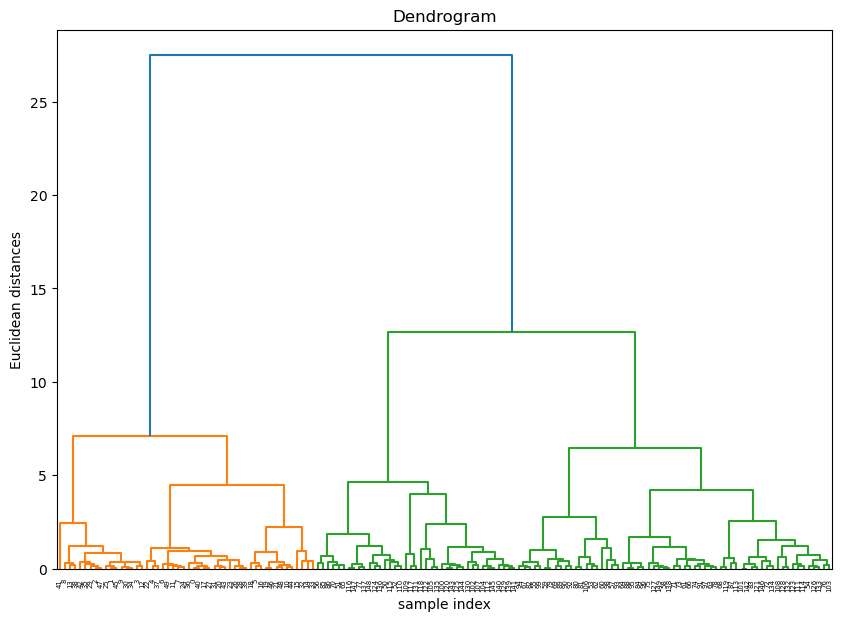

In [12]:
#Agglomerative Clustering
# to construct a dendrogram

import scipy.cluster.hierarchy as sc

plt.figure(figsize=(10, 7))
plt.title("Dendrograms")

sc.dendrogram(sc.linkage(pca_scaled, method='ward'))
plt.title('Dendrogram')
plt.xlabel('sample index')
plt.ylabel('Euclidean distances')

In [13]:
from sklearn.cluster import AgglomerativeClustering
cluster=AgglomerativeClustering(n_clusters=2,affinity='euclidean',linkage='ward')
cluster.fit(pca_scaled)

/Users/prasantpoudel/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


AgglomerativeClustering(affinity='euclidean')

In [14]:
cluster.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

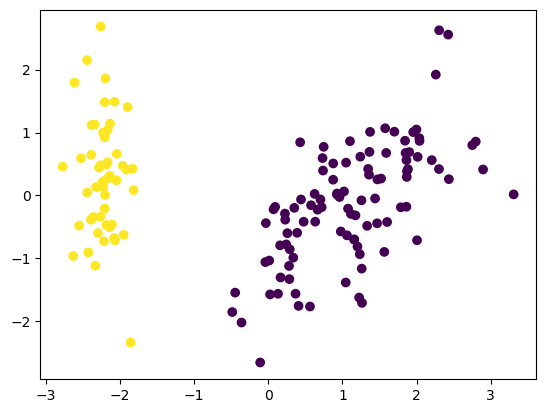

In [15]:
plt.scatter(pca_scaled[:,0], pca_scaled[:,1], c=cluster.labels_)

In [16]:
from sklearn.metrics import silhouette_score
silhouette_coeff=[]
for i in range(2,11):
    agglo = AgglomerativeClustering(n_clusters=i,affinity='euclidean',linkage='ward')
    agglo.fit(x_scaled)
    score=silhouette_score(x_scaled,agglo.labels_)
    silhouette_coeff.append(score)

/Users/prasantpoudel/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/Users/prasantpoudel/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/Users/prasantpoudel/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/Users/prasantpoudel/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/Users/prasa

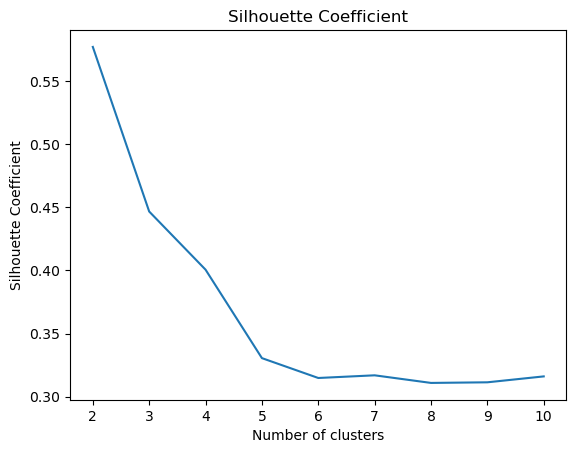

In [17]:
plt.plot(range(2, 11), silhouette_coeff)
plt.title('Silhouette Coefficient')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Coefficient')
plt.show()